# Task 1: Prediction using Supervised Learning
#  : Grip Jan21

# The Sparks Foundation

### Ritik Bhardwaj

## Loading necessary libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
print("Libraries imported")

Libraries imported


# Loading the data and analysing it

In [15]:
df=pd.read_csv('https://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [107]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Checking null values

In [18]:
print(df.columns)
df.isnull().sum()

Index(['Hours', 'Scores'], dtype='object')


Hours     0
Scores    0
dtype: int64

There are no null values

## plotting the data

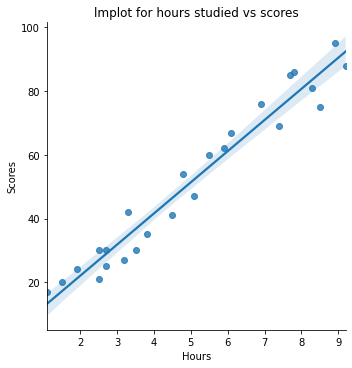

Text(0.5, 1.0, 'lineplot for hours studied vs scores')

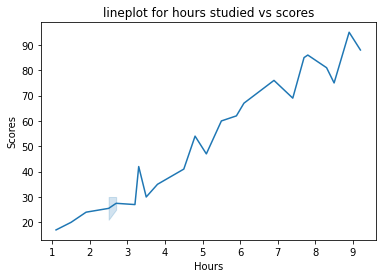

In [19]:
sns.lmplot(x ="Hours", y = "Scores", data = df)
plt.title("lmplot for hours studied vs scores")
plt.show()
sns.lineplot(x ="Hours", y = "Scores", data = df)
plt.title("lineplot for hours studied vs scores")

##### Splitting train data and test data

In [99]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.loc[:,"Scores"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


##### Training the model

In [100]:
clf = LinearRegression()
clf.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [101]:
print("Cofficient for trained model:",clf.coef_)
print("Intercept:",clf.intercept_)

Cofficient for trained model: [9.47529215]
Intercept: 3.418139427101295


### Plotting the model

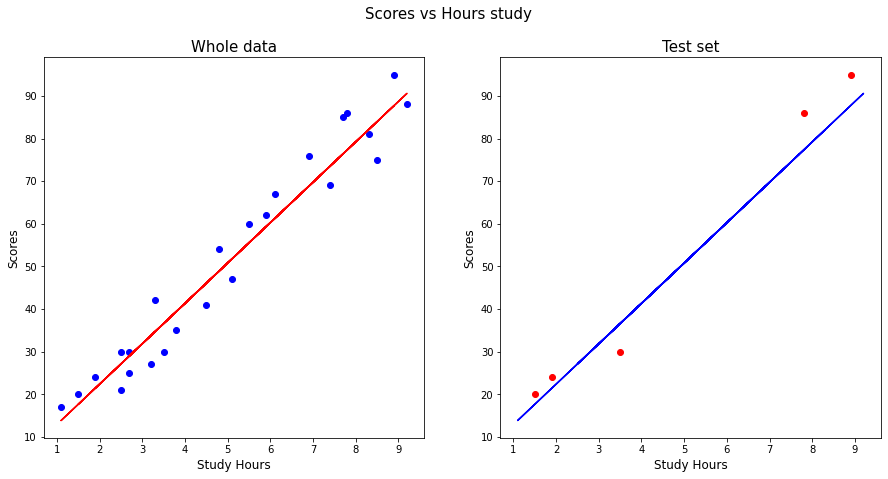

In [102]:
line = clf.coef_*X + clf.intercept_

fig, axes = plt.subplots(1,2, figsize = (15,7))
plt.suptitle("Scores vs Hours study", fontsize = 15)
# Whole data
axes[0].scatter(X, y, color = 'blue', label = "X")
axes[0].plot(X, line, color = 'red')
axes[0].set_xlabel('Study Hours', fontsize = 12)
axes[0].set_ylabel('Scores',fontsize = 12)
axes[0].set_title('Whole data', fontsize = 15)
# Test data
axes[1].scatter(X_test, y_test, color = 'red')
axes[1].plot(X_train, clf.predict(X_train), color = 'blue')
axes[1].set_title('Test set', fontsize = 15)
axes[1].set_xlabel('Study Hours', fontsize = 12)
axes[1].set_ylabel('Scores',fontsize = 12)
plt.show()

In [103]:
print("Model Score on training set",clf.score(X_train, y_train))
print("Model Score on training set",clf.score(X_test,y_test))

Model Score on training set 0.9442302809253366
Model Score on training set 0.965340758834823


##### Predicting X_train

In [108]:
prediction = clf.predict(X_test)
prediction

array([77.32541818, 87.74823954, 21.42119451, 17.63107765, 36.58166195])

In [105]:
X_test2 = X_test.loc[:,"Hours"]
data = {"Hours":X_test2,"Actual Score":y_test, "Predicted Score": prediction}
df2 = pd.DataFrame(data)
df2

,Hours,Actual Score,Predicted Score
24,7.8,86,77.325418
15,8.9,95,87.748240
17,1.9,24,21.421195
5,1.5,20,17.631078
4,3.5,30,36.581662


##### Calculating r2_score and MeanSquaredError

In [114]:
print("R2 score :", r2_score(y_test, prediction))
print("Mean Squared Error: " ,mean_squared_error(y_test, prediction))

R2 score : 0.965340758834823
Mean Squared Error:  36.683340849223434


##### Predicting score of student studying 9.25 hours

In [127]:
x1 = np.array([9.25])
x1 = x1.reshape(-1,1)
print("Score of student studying 9.25 hours: {}".format(np.round(clf.predict(x1)[0])))

Score of student studying 9.25 hours: 91.0


## Thanks